# TennensorFlow Image Classification
Task:
* Imports
* Data Preperation
* Create Model
* Evaluate Model
* Predict

In [1]:
# imports that will be used anywhere as required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Data preprocessing

In [2]:
# import fashion_mnist from tensorflow datasets
from tensorflow.keras.datasets import fashion_mnist

# the data has already been sorted into training and test sets and is in touple datatype
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# let's see the training data and labels for first column data
print(f"Training sample:\n{X_train[0]}\n")
print(f"Training labels:\n{y_train[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [4]:
# check the shape of data it will be important later on
X_train[0].shape, y_train[0].shape

((28, 28), ())

In [5]:
# total number of data and labels
print(f"total no. of data: {len(X_train)}")
print(f"unique labels: {set(y_train)}")
print(f"total no. of unique labels: {len(set(y_train))}")

total no. of data: 60000
unique labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
total no. of unique labels: 10


From the link https://github.com/zalandoresearch/fashion-mnist we can see that the labels represents

<table>
<thead>
<tr>
<th>Label</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>0</td>
<td>T-shirt/top</td>
</tr>
<tr>
<td>1</td>
<td>Trouser</td>
</tr>
<tr>
<td>2</td>
<td>Pullover</td>
</tr>
<tr>
<td>3</td>
<td>Dress</td>
</tr>
<tr>
<td>4</td>
<td>Coat</td>
</tr>
<tr>
<td>5</td>
<td>Sandal</td>
</tr>
<tr>
<td>6</td>
<td>Shirt</td>
</tr>
<tr>
<td>7</td>
<td>Sneaker</td>
</tr>
<tr>
<td>8</td>
<td>Bag</td>
</tr>
<tr>
<td>9</td>
<td>Ankle boot</td>
</tr>
</tbody>
</table>

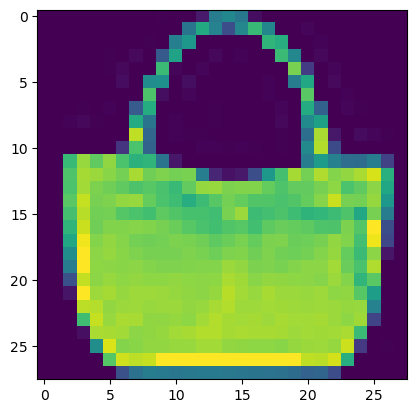

In [6]:
# plot single sample
plt.imshow(X_train[100]) #! imshow for images

In [7]:
# check out sample labels
y_train[100]

8

In [8]:
# store label names in list 
label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal","Shirt", "Sneaker", "Bag", "Ankle boot"]
len(label_names)

10

In [9]:
# plot an example image and its labels 

# first let's create a reusable function
def plot_single(X, y, index):
    plt.imshow(X[index], cmap=plt.cm.binary)
    plt.title(label_names[y[index]])

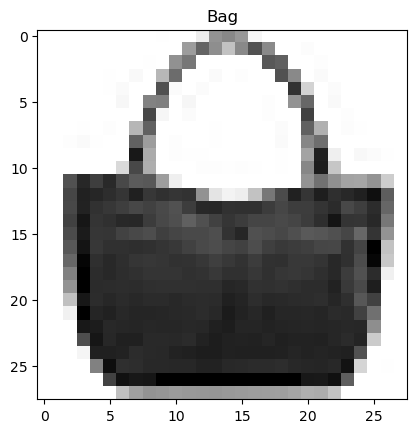

In [10]:
# now let's plot single image from data
plot_single(X_train, y_train, 100)

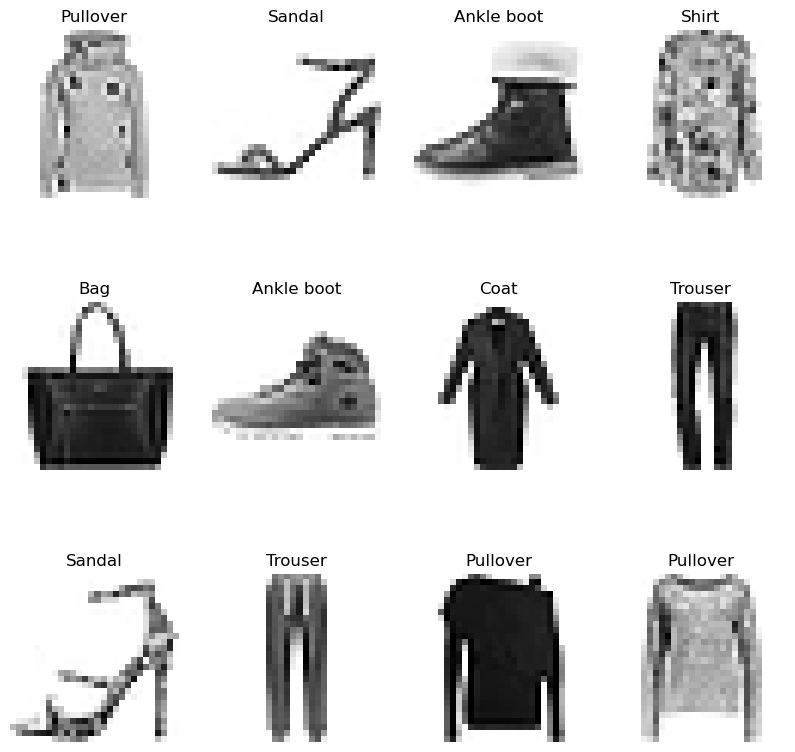

In [11]:
# plot multiple random images of fashion mnist
import random

plt.figure(figsize=(10, 10))
for i in range(12):
    ax = plt.subplot(3, 4, i+1)
    rand_index = random.choice(range(len(X_train)))
    plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
    plt.title(label_names[y_train[rand_index]])
    plt.axis(False)

### Feature Scaling - normalization

In [12]:
X_train[0].min(), X_train[0].max()

(0, 255)

#### Normal way

In [13]:
# even though it's not reusable lets use function to shape the data

def normalize_data(data):
    return data / data[0].max()

In [14]:
# normalize our data

X_train_norm = normalize_data(X_train)
X_test_norm = normalize_data(X_test)

print(f"Training sample:\n{X_train_norm[0]}\n")

Training sample:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  

#### using sklearn

In [15]:
from sklearn.preprocessing import MinMaxScaler

# to transform data using MinMaxScalar we need to reshape our data
X_train_reshaped = X_train.reshape((X_train.shape[0], -1))
X_test_reshaped = X_test.reshape((X_test.shape[0], -1))

scalar = MinMaxScaler()

# fitting Scalar
scalar.fit(X_train_reshaped)


# transform our data
X_train_norm_mns = scalar.transform(X_train_reshaped)
X_test_norm_mns = scalar.transform(X_test_reshaped)

# let's check on our train data
print(f"Training sample:\n{X_train_norm_mns[0]}\n")

Training sample:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00392157 0.         0.         0.050

### Create Model

In [16]:
# set random seed
tf.random.set_seed(42)

# create model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # X_train_norm shape
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # 10:total labels, softmax: multi-class classification
])

# compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.legacy.Adam(lr=0.0001),
             metrics=["accuracy"])

# fit the model
history = model.fit(X_train_norm,
                    y_train, epochs=20,
                    validation_data=(X_test_norm, y_test))

Epoch 1/20


/Users/achbj/opt/miniconda3/envs/nn/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2023-07-08 12:30:22.458368: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 12s 6ms/step - loss: 1.4239 - accuracy: 0.4921 - val_loss: 0.9236 - val_accuracy: 0.6656
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7898 - accuracy: 0.7166 - val_loss: 0.7388 - val_accuracy: 0.7450
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6786 - accuracy: 0.7658 - val_loss: 0.6692 - val_accuracy: 0.7752
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6236 - accuracy: 0.7908 - val_loss: 0.6329 - val_accuracy: 0.7855
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5931 - accuracy: 0.8008 - val_loss: 0.6115 - val_accuracy: 0.7924
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5751 - accuracy: 0.8061 - val_loss: 0.5974 - val_accuracy: 0.7981
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5601 - accuracy: 0.8105 - val_loss: 0.5861 - val_accuracy: 0.7

In [17]:
# set random seed
tf.random.set_seed(42)

# create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # X_train_norm shape
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # 10:total labels, softmax: multi-class classification
])

# compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),
             metrics=["accuracy"])

# fit the model
history_1 = model_1.fit(X_train_norm,
                    y_train, epochs=20,
                    validation_data=(X_test_norm, y_test))

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7384 - accuracy: 0.7470 - val_loss: 0.5491 - val_accuracy: 0.8130
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4949 - accuracy: 0.8294 - val_loss: 0.5232 - val_accuracy: 0.8185
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4622 - accuracy: 0.8399 - val_loss: 0.4955 - val_accuracy: 0.8236
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4447 - accuracy: 0.8462 - val_loss: 0.4720 - val_accuracy: 0.8324
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4361 - accuracy: 0.8494 - val_loss: 0.4695 - val_accuracy: 0.8352
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4289 - accuracy: 0.8510 - val_loss: 0.4719 - val_accuracy: 0.8342
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4247 - accuracy: 0.8540 - val_loss: 0.4708 - val_ac

<Axes: >

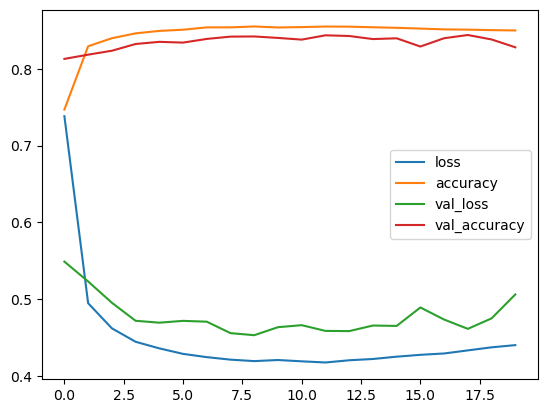

In [18]:
# plot loss curve
pd.DataFrame(history_1.history).plot()

In [19]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Let's check out another way of viewing our deep learnng models
from tensorflow.keras.utils import plot_model

# see the inputs and outputs of each layers
plot_model(model_1, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [21]:
# Create a confuxion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # set labels to be the classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])


  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # set threshold for different color
  threshold = (cm.max() + cm.min()) / 2.

  # plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [28]:
# let's see the probabilities of our predictions
y_probs = model_1.predict(X_test_norm)
y_probs

313/313 [==============================] - 0s 2ms/step


array([[1.3817649e-08, 8.1092727e-10, 7.4522501e-07, ..., 1.5693119e-01,
        4.9196748e-04, 7.7381057e-01],
       [2.6720516e-05, 5.3982301e-08, 9.8746604e-01, ..., 2.2395960e-30,
        9.7954626e-08, 1.8580426e-31],
       [1.8076893e-05, 9.9993658e-01, 7.0068895e-06, ..., 2.0001656e-17,
        8.9733994e-08, 8.7710882e-22],
       ...,
       [4.9208462e-02, 1.3645142e-07, 4.4068508e-04, ..., 1.9378882e-07,
        7.2216070e-01, 2.0485352e-12],
       [1.6002252e-06, 9.9974781e-01, 2.3743880e-06, ..., 1.4507460e-14,
        5.1609572e-08, 5.4890483e-14],
       [3.1339976e-05, 6.2411773e-06, 4.0444470e-04, ..., 8.5386876e-03,
        1.8657587e-02, 8.3782666e-05]], dtype=float32)

In [29]:
# let's store the max of each probabilities as our prediction
y_preds = y_probs.argmax(axis=1)
y_preds

array([9, 2, 1, ..., 8, 1, 5])

In [34]:
from sklearn.metrics import confusion_matrix

# let's see the confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_preds)

array([[862,   1,  16,  22,  10,   1,  73,   1,  14,   0],
       [  6, 954,   7,  25,   6,   0,   0,   0,   2,   0],
       [ 25,   5, 700,   8, 204,   0,  54,   0,   4,   0],
       [ 63,  13,  16, 786,  79,   0,  39,   0,   4,   0],
       [  1,   2,  75,  13, 879,   0,  26,   0,   4,   0],
       [  1,   1,   0,   0,   1, 888,   0,  63,  12,  34],
       [171,   2, 142,  17, 280,   0, 369,   0,  19,   0],
       [  0,   0,   0,   0,   0,  23,   0, 960,   0,  17],
       [  4,   2,  13,   6,   7,   2,  13,   5, 948,   0],
       [  2,   0,   0,   0,   0,   3,   2,  58,   0, 935]])

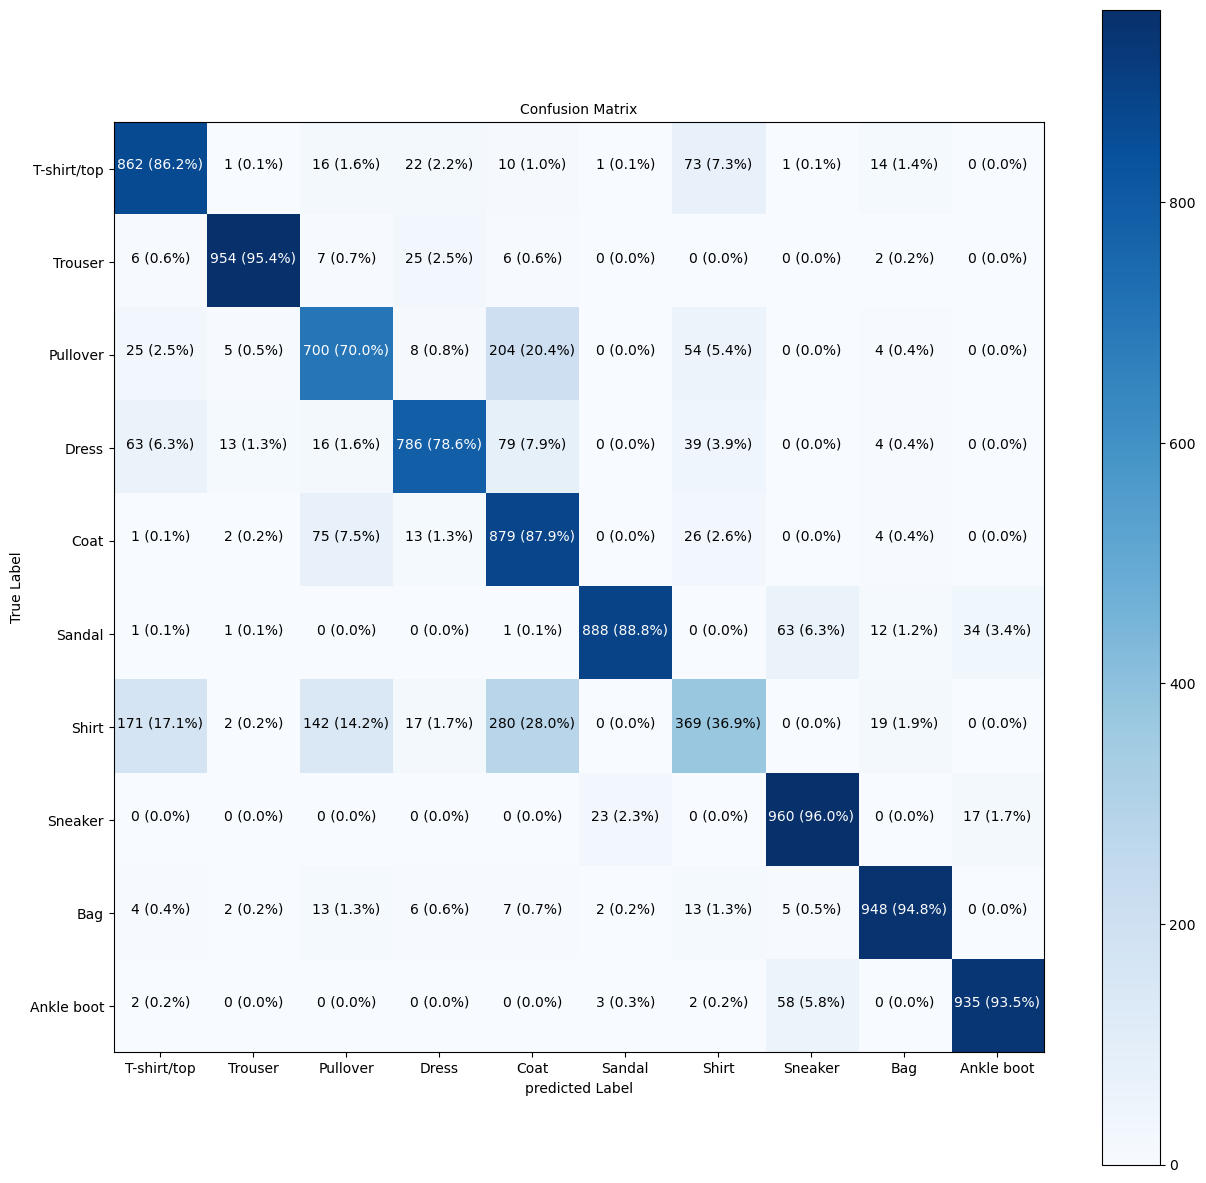

In [35]:
# make a prettier confusion matrix
make_confusion_matrix(y_true=y_test,
                      y_pred=y_preds,
                      classes=label_names,
                      figsize=(15, 15),
                      text_size=10)

In [36]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and turth label.
  """

  # set up  random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color fo the true of the titles depending on if the predictions is right or wring
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
             color=color)


1/1 [==============================] - 0s 12ms/step


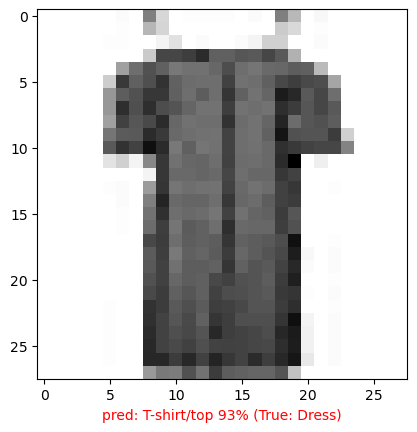

In [39]:
# let's see random plot of our predictions

plot_random_image(model=model_1,
                  images=X_test_norm,
                  true_labels=y_test,
                  classes=label_names)